In [9]:
import pandas as pd


In [16]:
import talib



In [18]:

# Load CSV
stock_data = pd.read_csv(
    r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\AAPL.csv", 
    parse_dates=['Date'], 
    index_col='Date'
)

# Check the data
print(stock_data.head())
print(stock_data.info())


               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Open    3774 non-null   float64
 4   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


Calculate Technical Indicators with TA-Lib

In [19]:


# Simple Moving Average (20 periods)
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Exponential Moving Average (20 periods)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(
    stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
stock_data['upper'], stock_data['middle'], stock_data['lower'] = talib.BBANDS(
    stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

print(stock_data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  191.788757  193.581821  191.164647  193.353962  37149600   
2023-12-26  191.243912  192.076049  191.025969  191.798670  28919300   
2023-12-27  191.342972  191.689703  189.302247  190.689158  48087700   
2023-12-28  191.768951  192.838849  191.362784  192.323710  34049900   
2023-12-29  190.728775  192.581275  189.936256  192.085953  42672100   

                SMA_20      EMA_20     RSI_14      MACD  MACD_signal  \
Date                                                                   
2023-12-22  191.856618  191.510231  54.672784  2.633141     3.235256   
2023-12-26  192.018094  191.484867  53.090049  2.304751     3.049155   
2023-12-27  192.154308  191.471353  53.354446  2.029104     2.845145   
2023-12-28  192.362839  191.499696  54.540999  1.823998     2.640915   
2023-12-29  192.490633  191.426275  51.121347  1.559539     2.4

Visualize the Data

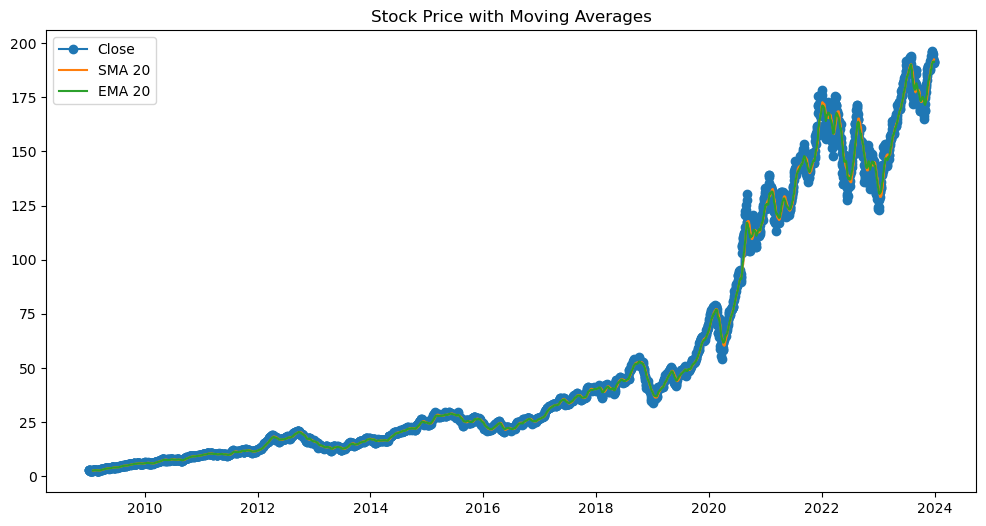

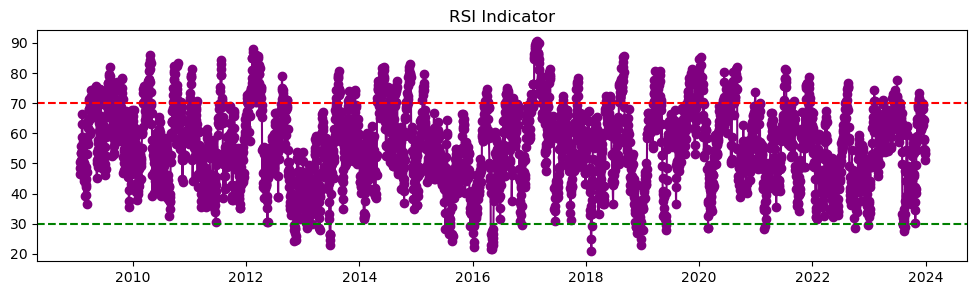

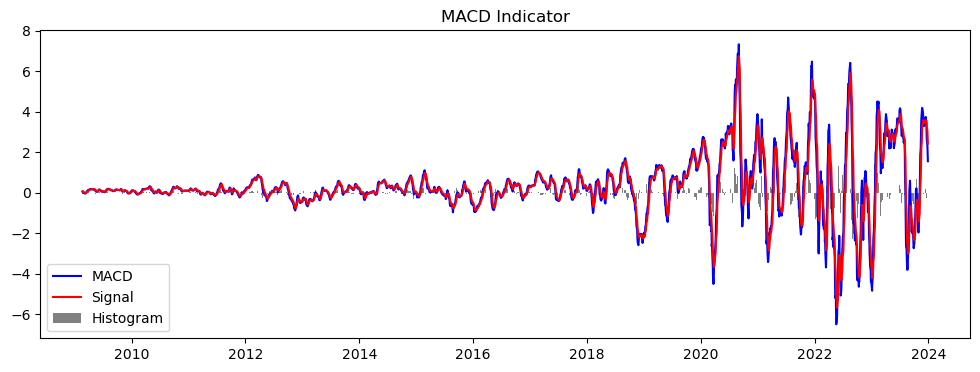

In [20]:
import matplotlib.pyplot as plt

# Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close', marker='o')
plt.plot(stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12,3))
plt.plot(stock_data['RSI_14'], label='RSI 14', color='purple', marker='o')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_signal'], label='Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_hist'], label='Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
